In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
print(f"tf.__version__ = {tf.__version__}")
print(f"pd.__version__ = {pd.__version__}")
print(f"np.__version__ = {np.__version__}")
print(f"keras.__version__ = {keras.__version__}")

tf.__version__ = 2.19.0
pd.__version__ = 2.2.2
np.__version__ = 2.0.2
keras.__version__ = 3.10.0


In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [5]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

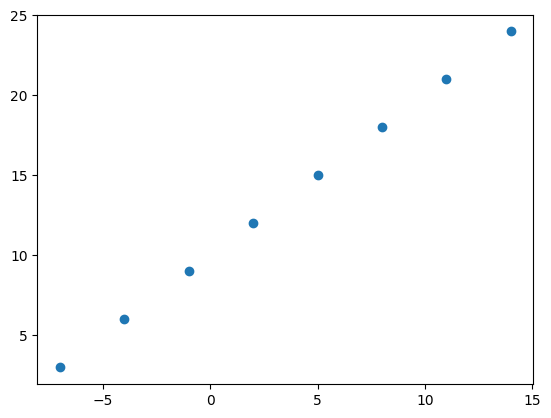

In [6]:
plt.scatter(X, y)
plt.show()

In [ ]:
house_info = tf.constant([
    'bedroom', 'bathroom', 'garage'
])
house_price = tf.constant([939700])

In [ ]:
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [9]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

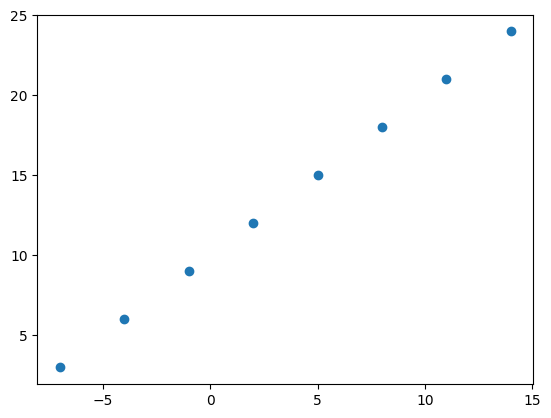

In [10]:
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X,y)
plt.show()

In [ ]:
X[0].shape

TensorShape([])

In [12]:
X.shape

TensorShape([8])

In [13]:
y.shape

TensorShape([8])

In [14]:
y[0].shape

TensorShape([])

In [15]:
X[0]

<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>

In [16]:
y[0]

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [17]:
tf.random.set_seed(42)

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

In [19]:
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [20]:
X.shape

TensorShape([8])

In [21]:
model.fit(tf.expand_dims(X,axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step - loss: 8.7008 - mae: 8.7008
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.5683 - mae: 8.5683
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.4358 - mae: 8.4358
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 8.3033 - mae: 8.3033
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 8.1708 - mae: 8.1708


In [22]:
tf.reduce_max(X),tf.reduce_min(X)

(<tf.Tensor: shape=(), dtype=float32, numpy=14.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-7.0>)

In [23]:
tf.reduce_max(y),tf.reduce_min(y)

(<tf.Tensor: shape=(), dtype=float32, numpy=24.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [25]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[26.335436]], dtype=float32)

In [26]:
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [27]:
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [28]:
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [29]:
len(X), len(y)

(50, 50)

In [ ]:
X_train = X[:40]
X_test = X[40:]

y_train = y[:40]
y_test = y[40:]

In [31]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

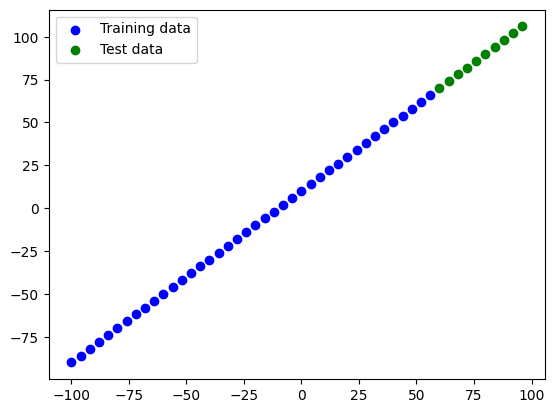

In [32]:
plt.scatter(X_train, y_train, c='b', label="Training data")
plt.scatter(X_test, y_test, c='g', label="Test data")
plt.legend()
plt.show()

In [33]:
tf.random.set_seed(42)

model = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=[1]),
        tf.keras.layers.Dense(1)
    ]
)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
y_train

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66])

In [36]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

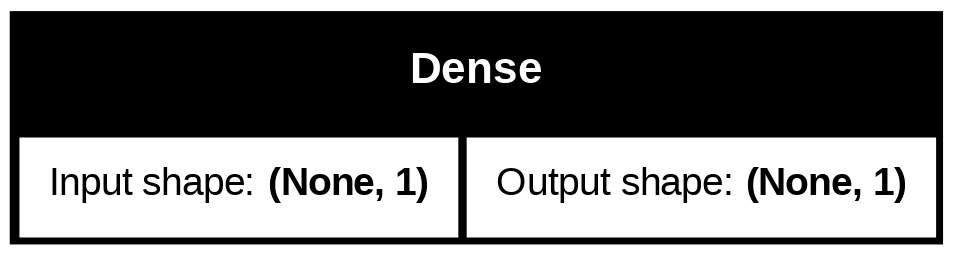

In [38]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [39]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [40]:
y_pred

array([[ 73.12763 ],
       [ 77.82081 ],
       [ 82.513985],
       [ 87.20716 ],
       [ 91.90034 ],
       [ 96.59351 ],
       [101.28668 ],
       [105.97986 ],
       [110.673035],
       [115.36621 ]], dtype=float32)

In [ ]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test,test_labels=y_test, predictions=y_pred):

    plt.scatter(train_data, train_labels, c='b', label='Training Data')
    plt.scatter(test_data, test_labels, c='r', label='Test Data')
    plt.scatter(test_labels, predictions, c='g', label='Predicted Data')
    plt.legend()
    plt.show()

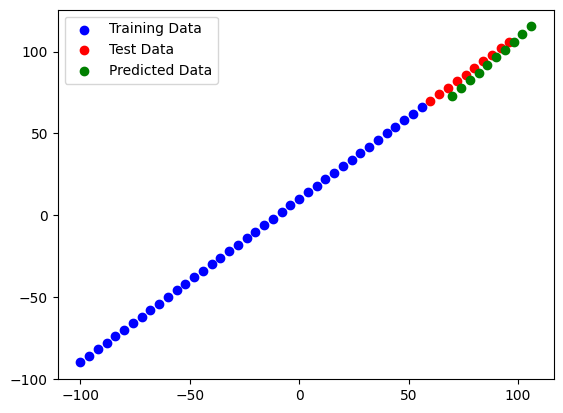

In [42]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

In [43]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 6.2469 - mae: 6.2469


[6.246922492980957, 6.246922492980957]

In [44]:
model.evaluate(X_train, y_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 12.1927 - mae: 12.1927


[11.361398696899414, 11.361398696899414]

In [ ]:
y_test.shape, y_pred.shape

((10,), (10, 1))

In [46]:
y_pred.squeeze().shape

(10,)

In [47]:
mae = tf.keras.losses.MeanAbsoluteError()(y_test, y_pred.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=6.246922492980957>

In [48]:
mse = tf.keras.losses.MeanSquaredError()(y_test, y_pred.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=42.98809814453125>

In [49]:
np.sqrt(68.74656677246094)

np.float64(8.29135494189345)

In [ ]:
np.square(8.023613929748535)

np.float64(64.37838049365473)

In [51]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


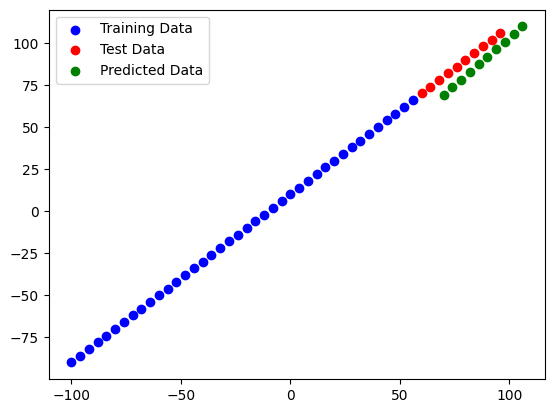

In [52]:
ypred_1 = model_1.predict(X_test)
plot_predictions(predictions=ypred_1)

In [53]:
mae_1 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_1.squeeze()).numpy()
mse_1 = tf.keras.losses.MeanSquaredError()(y_test, ypred_1.squeeze()).numpy()

print(f"Mean Absolute Error = {mae:.2f}")
print(f"Mean Squared Error = {mse:.2f}")

Mean Absolute Error = 6.25
Mean Squared Error = 42.99


In [54]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


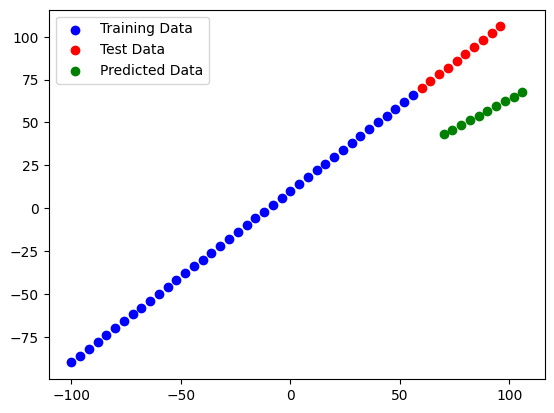

In [55]:
ypred_2 = model_2.predict(X_test)
plot_predictions(predictions=ypred_2)

In [56]:
mae_2 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_2.squeeze()).numpy()
mse_2 = tf.keras.losses.MeanSquaredError()(y_test, ypred_2.squeeze()).numpy()

print(f"Mean Absolute Error = {mae_2:.2f}")
print(f"Mean Squared Error = {mse_2:.2f}")

Mean Absolute Error = 32.58
Mean Squared Error = 1073.90


In [57]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=600, verbose=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


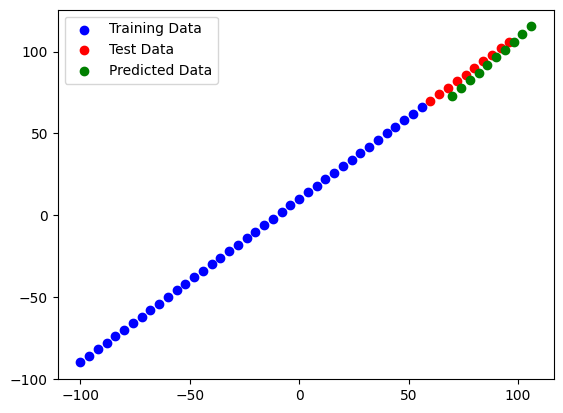

In [58]:
ypred_3 = model.predict(X_test)
plot_predictions(predictions=ypred_3)

In [59]:
mae_3 = tf.keras.losses.MeanAbsoluteError()(y_test, ypred_3.squeeze()).numpy()
mse_3 = tf.keras.losses.MeanSquaredError()(y_test, ypred_3.squeeze()).numpy()

print(f"Mean Absolute Error = {mae_3:.2f}")
print(f"Mean Squared Error = {mse_3:.2f}")

Mean Absolute Error = 6.25
Mean Squared Error = 42.99


In [60]:
print("MAE and MSE of different models")
print()
print(f"model_1 mae = {mae_1:.2f}")
print(f"model_1 mse = {mse_1:.2f}")
print()
print(f"model_2 mae = {mae_2:.2f}")
print(f"model_2 mse = {mse_2:.2f}")
print()
print(f"model_3 mae = {mae_3:.2f}")
print(f"model_3 mse = {mse_3:.2f}")


MAE and MSE of different models

model_1 mae = 1.75
model_1 mse = 4.56

model_2 mae = 32.58
model_2 mse = 1073.90

model_3 mae = 6.25
model_3 mse = 42.99


In [61]:
model_results = pd.DataFrame({
    'model':['model_1', 'model_2', 'model_3'],
    'mae':[mae_1, mae_2, mae_3],
    'mse':[mse_1, mse_2, mse_3]
})
model_results

,model,mae,mse
0,model_1,1.747918,4.561036
1,model_2,32.575195,1073.900024
2,model_3,6.246922,42.988098


In [62]:
model_1.save("model.keras")

In [63]:
!ls model.keras

model.keras


In [64]:
model = tf.keras.models.load_model('model.keras')

In [65]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


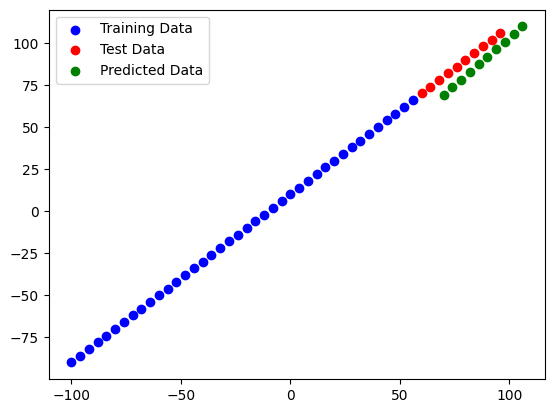

In [66]:
plot_predictions(predictions=y_pred)

In [67]:
# Read in the insurance dataset
df= pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [68]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [70]:
df = pd.get_dummies(df,dtype=int)

In [71]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [72]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

In [73]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [74]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [76]:
df_model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1),
        tf.keras.layers.Dense(1)
    ]
)

df_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

df_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9926.6680 - mae: 9926.6680    
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7649.8306 - mae: 7649.8306
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7464.6650 - mae: 7464.6650
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7830.8667 - mae: 7830.8667
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7660.6646 - mae: 7660.6646
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7486.7349 - mae: 7486.7349
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7510.4556 - mae: 7510.4556
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7691.8589 - mae: 7691.8589
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7714.6748 - mae: 7714.6748
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7391.3740 - mae: 7391.3740
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7639.5352 - mae: 7639.5352
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/s

In [77]:
df['charges'].max()

63770.42801

In [78]:
df['charges'].min()

1121.8739

In [79]:
df_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 8546.8750 - mae: 8546.8750  


[8282.9658203125, 8282.9658203125]

In [80]:
df_model_2 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

df_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

history = df_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [81]:
df_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5124.2822 - mae: 5124.2822  


[4969.20458984375, 4969.20458984375]

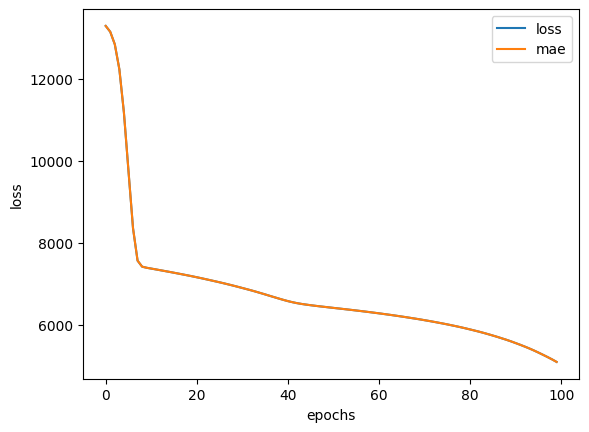

In [82]:
pd.DataFrame(history.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [83]:
history_2 = df_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [84]:
df_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3479.2241 - mae: 3479.2241 


[3412.95654296875, 3412.95654296875]

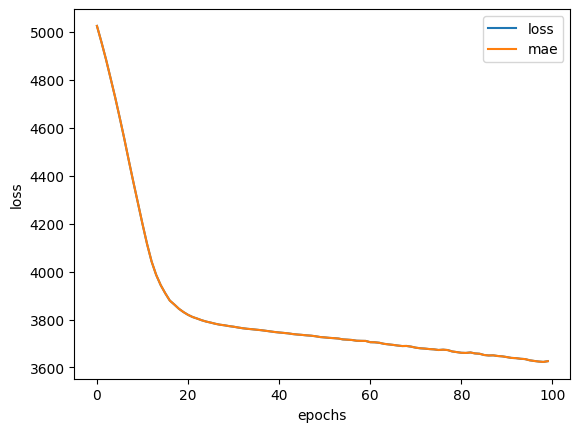

In [85]:
pd.DataFrame(history_2.history).plot()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [86]:
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [87]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = ColumnTransformer([
    ("min_max", MinMaxScaler(), ['age', 'bmi', 'children']),
    ("one_hot_encoder",OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
])

In [99]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [100]:
X_train_norm = ct.fit_transform(X_train)
X_test_norm = ct.transform(X_test)

In [101]:
X_train_norm

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [102]:
X_test_norm

array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.7826087 , 0.84611246, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7173913 , 0.49071832, 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [109]:
tf.random.set_seed(42)


df_model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1)
    ]
)

df_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

df_model_3.fit(X_train_norm, y_train, epochs=100, verbose=0)

In [110]:
df_model_3.evaluate(X_test_norm, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3517.8044 - mae: 3517.8044  


[3431.550048828125, 3431.550048828125]